# UNIVERSIDAD INTERNACIONAL DE ANDALUCIA
# MASTER EN BIG DATA
### CURSO: TRABAJO FIN DE MASTER

### **MODELOS DE CLASIFICACIÓN EN MACHINE LEARNING**

**SILVA MARCHAN HENRY ALEJANDRO**

# 1. Base de datos

**Importe las bibliotecas habituales para pandas y visualización**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


## Obtenemos los datos: 
Se trabajará con el dataset que corresponde a la data de ENAHO.

El conjunto de datos ya fue trabajado en STATA.


In [ ]:
# Monto el drive para trabajar con nuestro fichero
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# vamos a leer ese archivo de datos y asignarlo a una variable
ENAHO = pd.read_stata('/content/drive/My Drive/UNIA/hs_enaho_2020.dta')
print(ENAHO)

/usr/local/lib/python3.7/dist-packages/pandas/io/stata.py:1434: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


      conglome vivienda hogar  ... salario_semanal salario_hora pobreza
0       005002      011    11  ...       45.687500     3.045833     1.0
1       005002      011    11  ...        0.000000     0.000000     1.0
2       005002      011    11  ...      790.604187    87.844910     2.0
3       005002      023    11  ...      670.312500    14.261968     2.0
4       005002      049    11  ...        0.000000     0.000000     1.0
...        ...      ...   ...  ...             ...          ...     ...
91310   020353      055    11  ...        0.000000     0.000000     1.0
91311   020353      055    11  ...        0.000000     0.000000     1.0
91312   020353      062    11  ...      305.104156     7.264385     2.0
91313   020353      062    11  ...        0.000000     0.000000     1.0
91314   020353      062    11  ...        0.000000     0.000000     1.0

[91315 rows x 34 columns]


## Exploración Estadística de la Base de Datos

In [ ]:
ENAHO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91315 entries, 0 to 91314
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   conglome         91315 non-null  object  
 1   vivienda         91315 non-null  object  
 2   hogar            91315 non-null  object  
 3   codperso         91315 non-null  object  
 4   ubigeo           91315 non-null  object  
 5   dominio          91315 non-null  category
 6   estrato          91315 non-null  category
 7   p203             91315 non-null  category
 8   p207             91315 non-null  category
 9   p208a            91315 non-null  float32 
 10  p209             91315 non-null  category
 11  facpob07         91315 non-null  float32 
 12  p301a            91268 non-null  category
 13  p301b            86626 non-null  float64 
 14  p301c            12262 non-null  float64 
 15  p301d            86625 non-null  category
 16  i518             11332 non-null  float32

In [ ]:
ENAHO.describe()

,p208a,facpob07,p301b,p301c,i518,i513t,i530a,i524e1,i538e1,i541a,genero,edad,estado_civil,nivelprevio,suma,educacion,horas,ingresos,salario_mensual,salario_semanal,salario_hora,pobreza
count,91315.000000,91315.000000,86626.000000,12262.000000,11332.000000,60647.000000,24973.000000,21341.000000,1622.000000,3189.000000,91315.000000,91315.000000,91315.000000,91268.000000,91315.000000,91268.000000,91315.000000,91315.000000,91315.000000,91315.000000,91315.000000,91315.000000
mean,41.787220,279.719116,3.192494,4.332735,16.777136,33.542053,7433.811703,15146.957944,5301.538086,4756.503008,1.515644,41.787220,1.544982,5.665337,3.610371,9.277567,24.359016,5833.272461,486.103760,121.525940,3.375500,1.355725
std,19.132719,288.221069,1.861834,1.954053,12.653676,19.978941,13412.010410,13534.828416,6609.562988,17537.983286,0.499600,19.132719,0.626185,4.292593,1.719587,4.623218,24.106758,12150.872070,1013.047119,253.261780,13.568316,0.478953
min,14.000000,1.163049,0.000000,0.000000,1.000000,0.000000,12.000000,117.000000,120.000000,7.200000,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,101.282402,2.000000,3.000000,7.000000,18.000000,1447.000000,7191.000000,1416.500000,646.000000,1.000000,25.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,40.000000,190.917618,3.000000,5.000000,14.000000,32.000000,3658.000000,12036.000000,2979.000000,1739.000000,2.000000,40.000000,1.000000,6.000000,4.000000,11.000000,21.000000,227.000000,18.916666,4.729167,0.000000,1.000000
75%,56.000000,338.740082,5.000000,6.000000,24.000000,48.000000,8731.200195,19125.000000,6386.000000,4644.000000,2.000000,56.000000,2.000000,11.000000,5.000000,12.000000,44.000000,7942.000000,661.833313,165.458328,4.110725,2.000000
max,98.000000,2278.138672,7.000000,6.000000,98.000000,160.000000,599734.000000,239369.000000,73665.000000,856653.000000,2.000000,98.000000,4.000000,16.000000,7.000000,18.000000,160.000000,878347.000000,73195.585938,18298.896484,1658.110229,2.000000


In [ ]:
ENAHO.head(10)

,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p203,p207,p208a,p209,facpob07,p301a,p301b,p301c,p301d,i518,i513t,i530a,i524e1,i538e1,i541a,genero,edad,estado_civil,nivelprevio,suma,educacion,horas,ingresos,salario_mensual,salario_semanal,salario_hora,pobreza
0,005002,011,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,mujer,66.0,soltero(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,15.0,2193.0,NaN,NaN,NaN,2.0,66.0,2.0,0.0,5.0,5.0,15.0,2193.0,182.750000,45.687500,3.045833,1.0
1,005002,011,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),hombre,43.0,soltero(a),57.675755,primaria incompleta,0.0,2.0,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0,2.0,0.0,2.0,2.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
2,005002,011,11,03,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),mujer,47.0,separado(a),57.675755,superior no universitaria completa,3.0,NaN,estatal,NaN,9.0,NaN,37949.0,NaN,NaN,2.0,47.0,2.0,11.0,3.0,14.0,9.0,37949.0,3162.416748,790.604187,87.844910,2.0
3,005002,023,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,62.0,separado(a),57.675755,secundaria completa,5.0,NaN,estatal,20.0,27.0,17714.0,NaN,NaN,14461.0,1.0,62.0,2.0,6.0,5.0,11.0,47.0,32175.0,2681.250000,670.312500,14.261968,2.0
4,005002,049,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,74.0,casado(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,74.0,1.0,6.0,5.0,11.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
5,005002,049,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,esposo(a)/compañero(a),mujer,73.0,casado(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,2.0,73.0,1.0,0.0,5.0,5.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
6,005002,049,11,03,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),hombre,51.0,soltero(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,48.0,8528.0,NaN,NaN,NaN,1.0,51.0,2.0,6.0,5.0,11.0,48.0,8528.0,710.666687,177.666672,3.701389,2.0
7,005002,049,11,04,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),mujer,48.0,soltero(a),57.675755,superior universitaria completa,5.0,NaN,estatal,NaN,72.0,NaN,20272.0,NaN,NaN,2.0,48.0,2.0,11.0,5.0,16.0,72.0,20272.0,1689.333374,422.333344,5.865741,2.0
8,005002,073,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,60.0,casado(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60.0,1.0,6.0,5.0,11.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
9,005002,073,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,esposo(a)/compañero(a),mujer,58.0,casado(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,2.0,58.0,1.0,0.0,5.0,5.0,0.0,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
filtro = df['horas'] > 0 
ENAHO_0 = df[filtro]

In [ ]:
filtro_2 = df['salario_hora'] > 0
ENAHO= df[filtro]

In [ ]:
ENAHO.head(10)

,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p203,p207,p208a,p209,facpob07,p301a,p301b,p301c,p301d,i518,i513t,i530a,i524e1,i538e1,i541a,genero,edad,estado_civil,nivelprevio,suma,educacion,horas,ingresos,salario_mensual,salario_semanal,salario_hora,pobreza
0,005002,011,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,mujer,66.0,soltero(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,15.0,2193.0,NaN,NaN,NaN,2.0,66.0,2.0,0.0,5.0,5.0,15.0,2193.0,182.750000,45.687500,3.045833,1.0
1,005002,011,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),hombre,43.0,soltero(a),57.675755,primaria incompleta,0.0,2.0,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0,2.0,0.0,2.0,2.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
2,005002,011,11,03,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),mujer,47.0,separado(a),57.675755,superior no universitaria completa,3.0,NaN,estatal,NaN,9.0,NaN,37949.0,NaN,NaN,2.0,47.0,2.0,11.0,3.0,14.0,9.0,37949.0,3162.416748,790.604187,87.844910,2.0
3,005002,023,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,62.0,separado(a),57.675755,secundaria completa,5.0,NaN,estatal,20.0,27.0,17714.0,NaN,NaN,14461.0,1.0,62.0,2.0,6.0,5.0,11.0,47.0,32175.0,2681.250000,670.312500,14.261968,2.0
4,005002,049,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,74.0,casado(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,74.0,1.0,6.0,5.0,11.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
5,005002,049,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,esposo(a)/compañero(a),mujer,73.0,casado(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,2.0,73.0,1.0,0.0,5.0,5.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
6,005002,049,11,03,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),hombre,51.0,soltero(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,48.0,8528.0,NaN,NaN,NaN,1.0,51.0,2.0,6.0,5.0,11.0,48.0,8528.0,710.666687,177.666672,3.701389,2.0
7,005002,049,11,04,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),mujer,48.0,soltero(a),57.675755,superior universitaria completa,5.0,NaN,estatal,NaN,72.0,NaN,20272.0,NaN,NaN,2.0,48.0,2.0,11.0,5.0,16.0,72.0,20272.0,1689.333374,422.333344,5.865741,2.0
8,005002,073,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,60.0,casado(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60.0,1.0,6.0,5.0,11.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
9,005002,073,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,esposo(a)/compañero(a),mujer,58.0,casado(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,2.0,58.0,1.0,0.0,5.0,5.0,0.0,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
print(ENAHO['pobreza'].value_counts())

1.0    58832
2.0    32483
Name: pobreza, dtype: int64


In [ ]:
ENAHO.isna().sum()

conglome               0
vivienda               0
hogar                  0
codperso               0
ubigeo                 0
dominio                0
estrato                0
p203                   0
p207                   0
p208a                  0
p209                   0
facpob07               0
p301a                 47
p301b               4689
p301c              79053
p301d               4690
i518               79983
i513t              30668
i530a              66342
i524e1             69974
i538e1             89693
i541a              88126
genero                 0
edad                   0
estado_civil           0
nivelprevio           47
suma                   0
educacion             47
horas                  0
ingresos               0
salario_mensual        0
salario_semanal        0
salario_hora           0
pobreza                0
dtype: int64

In [ ]:
#df.dropna(inplace = True)
# Reemplazar valores en nivel previo
ENAHO['nivelprevio'].fillna('6', inplace=True)
ENAHO['educacion'].fillna('9', inplace=True)

In [ ]:
ENAHO.isna().sum()

conglome               0
vivienda               0
hogar                  0
codperso               0
ubigeo                 0
dominio                0
estrato                0
p203                   0
p207                   0
p208a                  0
p209                   0
facpob07               0
p301a                 47
p301b               4689
p301c              79053
p301d               4690
i518               79983
i513t              30668
i530a              66342
i524e1             69974
i538e1             89693
i541a              88126
genero                 0
edad                   0
estado_civil           0
nivelprevio            0
suma                   0
educacion              0
horas                  0
ingresos               0
salario_mensual        0
salario_semanal        0
salario_hora           0
pobreza                0
dtype: int64

In [ ]:
ENAHO.head(10)

,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p203,p207,p208a,p209,facpob07,p301a,p301b,p301c,p301d,i518,i513t,i530a,i524e1,i538e1,i541a,genero,edad,estado_civil,nivelprevio,suma,educacion,horas,ingresos,salario_mensual,salario_semanal,salario_hora,pobreza
0,005002,011,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,mujer,66.0,soltero(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,15.0,2193.0,NaN,NaN,NaN,2.0,66.0,2.0,0,5.0,5,15.0,2193.0,182.750000,45.687500,3.045833,1.0
1,005002,011,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),hombre,43.0,soltero(a),57.675755,primaria incompleta,0.0,2.0,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0,2.0,0,2.0,2,0.0,0.0,0.000000,0.000000,0.000000,1.0
2,005002,011,11,03,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),mujer,47.0,separado(a),57.675755,superior no universitaria completa,3.0,NaN,estatal,NaN,9.0,NaN,37949.0,NaN,NaN,2.0,47.0,2.0,11,3.0,14,9.0,37949.0,3162.416748,790.604187,87.844910,2.0
3,005002,023,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,62.0,separado(a),57.675755,secundaria completa,5.0,NaN,estatal,20.0,27.0,17714.0,NaN,NaN,14461.0,1.0,62.0,2.0,6,5.0,11,47.0,32175.0,2681.250000,670.312500,14.261968,2.0
4,005002,049,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,74.0,casado(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,74.0,1.0,6,5.0,11,0.0,0.0,0.000000,0.000000,0.000000,1.0
5,005002,049,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,esposo(a)/compañero(a),mujer,73.0,casado(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,2.0,73.0,1.0,0,5.0,5,0.0,0.0,0.000000,0.000000,0.000000,1.0
6,005002,049,11,03,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),hombre,51.0,soltero(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,48.0,8528.0,NaN,NaN,NaN,1.0,51.0,2.0,6,5.0,11,48.0,8528.0,710.666687,177.666672,3.701389,2.0
7,005002,049,11,04,010101,sierra norte,de 20 000 a 49 999 habitantes,hijo(a)/hijastro(a),mujer,48.0,soltero(a),57.675755,superior universitaria completa,5.0,NaN,estatal,NaN,72.0,NaN,20272.0,NaN,NaN,2.0,48.0,2.0,11,5.0,16,72.0,20272.0,1689.333374,422.333344,5.865741,2.0
8,005002,073,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,jefe/jefa,hombre,60.0,casado(a),57.675755,secundaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60.0,1.0,6,5.0,11,0.0,0.0,0.000000,0.000000,0.000000,1.0
9,005002,073,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,esposo(a)/compañero(a),mujer,58.0,casado(a),57.675755,primaria completa,5.0,NaN,estatal,NaN,NaN,NaN,NaN,NaN,NaN,2.0,58.0,1.0,0,5.0,5,0.0,0.0,0.000000,0.000000,0.000000,1.0


# 2. *División* de entrenamiento y prueba

In [ ]:
# Definimos la variable respuesta y las variables predictoras
predictoras = ['genero','edad','estado_civil','educacion', 'horas', 'salario_hora']
target = 'pobreza'

In [ ]:
# Obtenemos del dataframe el conjunto de datos
X = ENAHO[predictoras]
y = ENAHO[target]
#Visualizamos las variables predictoras
print('\n\nVisualizamos la variable predictora/independiente (X)')
display(X)
print('\n\nVisualizamos la variable respuesta/dependiente (Y)')
y



Visualizamos la variable predictora/independiente (X)


,genero,edad,estado_civil,educacion,horas,salario_hora
0,2.0,66.0,2.0,5,15.0,3.045833
1,1.0,43.0,2.0,2,0.0,0.000000
2,2.0,47.0,2.0,14,9.0,87.844910
3,1.0,62.0,2.0,11,47.0,14.261968
4,1.0,74.0,1.0,11,0.0,0.000000
...,...,...,...,...,...,...
91310,1.0,24.0,1.0,9,42.0,0.000000
91311,2.0,22.0,1.0,14,0.0,0.000000
91312,2.0,26.0,1.0,6,42.0,7.264385
91313,1.0,31.0,1.0,3,0.0,0.000000




Visualizamos la variable respuesta/dependiente (Y)


0        1.0
1        1.0
2        2.0
3        2.0
4        1.0
        ... 
91310    1.0
91311    1.0
91312    2.0
91313    1.0
91314    1.0
Name: pobreza, Length: 91315, dtype: float32

In [ ]:
from sklearn.model_selection import train_test_split
#X = df.drop('size',axis=1)
#y = df['size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [ ]:
X.head(10)

,genero,edad,estado_civil,educacion,horas,salario_hora
0,2.0,66.0,2.0,5,15.0,3.045833
1,1.0,43.0,2.0,2,0.0,0.000000
2,2.0,47.0,2.0,14,9.0,87.844910
3,1.0,62.0,2.0,11,47.0,14.261968
4,1.0,74.0,1.0,11,0.0,0.000000
5,2.0,73.0,1.0,5,0.0,0.000000
6,1.0,51.0,2.0,11,48.0,3.701389
7,2.0,48.0,2.0,16,72.0,5.865741
8,1.0,60.0,1.0,11,0.0,0.000000
9,2.0,58.0,1.0,5,0.0,0.000000


In [ ]:
y.head(10)

0    1.0
1    1.0
2    2.0
3    2.0
4    1.0
5    1.0
6    2.0
7    2.0
8    1.0
9    1.0
Name: pobreza, dtype: float32

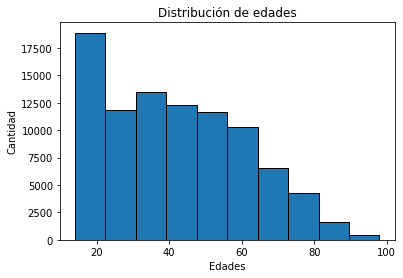

In [ ]:
plt.hist(ENAHO['edad'], bins=10, edgecolor='black')
plt.title("Distribución de edades")
plt.xlabel("Edades")
plt.ylabel("Cantidad")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


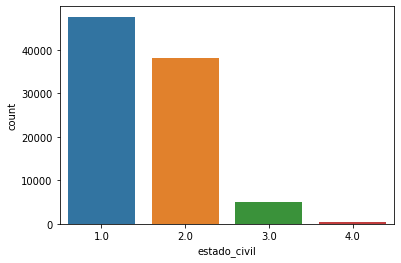

In [ ]:
import seaborn as sns
sns.countplot(ENAHO['estado_civil'],label="Count")
#1 Casado  2 Soltero  3 Viudo  4 Divorciado
plt.show()

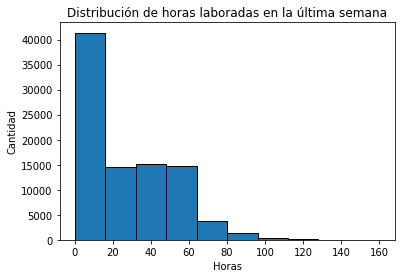

In [ ]:
plt.hist(ENAHO['horas'], bins=10, edgecolor='black')
plt.title("Distribución de horas laboradas en la última semana")
plt.xlabel("Horas")
plt.ylabel("Cantidad")
plt.show()

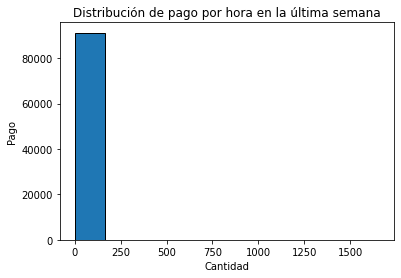

In [ ]:
plt.hist(ENAHO['salario_hora'], bins=10, edgecolor='black')
plt.title("Distribución de pago por hora en la última semana")
plt.xlabel("Pago")
plt.ylabel("Cantidad")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


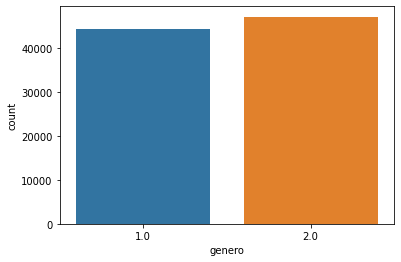

In [ ]:
import seaborn as sns
sns.countplot(ENAHO['genero'],label="Cantidad")
#1 Masculino  2 Femenino
plt.show()

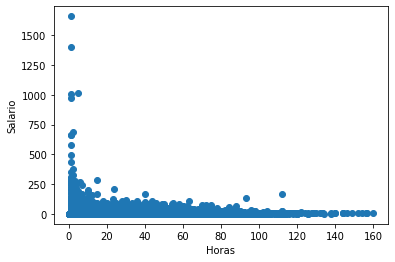

In [ ]:
x = ENAHO['horas']
y = ENAHO['salario_hora']
plt.xlabel("Horas")
plt.ylabel("Salario")
plt.scatter(x, y)
plt.show()

3. ESCALAMIENTO DE LOS DATOS

Nota: solo de debe escalar los datos de entrada (atributos) 

In [ ]:
# Clase para escalar a un intervalo cerrado, por defecto a [0,1]
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
# Encuentra los parametros para el escalamiento
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
# se aplica el scalado a los datos de entrenamiento
X_train_scaled = scaler.transform(X_train)

In [ ]:
type(X_train_scaled)

numpy.ndarray

In [ ]:
# Los datos de test debe ser escalados con los paramétros obtenidos en la data de entrenamiento
X_test_scaled = scaler.transform(X_test)

**Nota: Si desea evaluar el modelo en un nuevo dato, este debe ser escalado con los paramétros obtenidos en la data de entrenamiento**

## Importación de las metricas

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# 4. Modelo de Árbol de Clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [ ]:
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

## 4.1 Evaluación del árbol de decisiones con los datos de entrenamiento

Informe de clasificación y matriz de confusión para los datos de entrenamiento

In [ ]:
predictions_train = dtree.predict(X_train_scaled)

In [ ]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99     47136
         2.0       1.00      0.97      0.98     25916

    accuracy                           0.99     73052
   macro avg       0.99      0.98      0.99     73052
weighted avg       0.99      0.99      0.99     73052



In [ ]:
cm=confusion_matrix(y_train,predictions_train)
print(cm)

[[47102    34]
 [  860 25056]]


## 4.2 Evaluación del árbol de decisiones con los datos de test

Se crea predicciones a partir del conjunto de test y creamos un informe de clasificación y la matriz de confusión

In [ ]:
predictions_test = dtree.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99     11696
         2.0       0.99      0.96      0.98      6567

    accuracy                           0.98     18263
   macro avg       0.98      0.98      0.98     18263
weighted avg       0.98      0.98      0.98     18263



In [ ]:
cm=confusion_matrix(y_test,predictions_test)
print(cm)

[[11624    72]
 [  246  6321]]


## 4.3 Predicción con el arbol del decision en un dato nuevo

In [ ]:
# genero	edad	estado_civil	educacion	horas	salario_hora
dato_nuevo = [[1.0,39.0,2.0,5,48.0,19.04]]

In [ ]:
dato_nuevo_scaled= scaler.transform(dato_nuevo)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(dato_nuevo_scaled)

[[0.         0.29761905 0.33333333 0.27777778 0.3        0.01363185]]


In [ ]:
nueva_prediccion= dtree.predict(dato_nuevo_scaled)

In [ ]:
print(nueva_prediccion)

[2.]


### Tabla de comparación

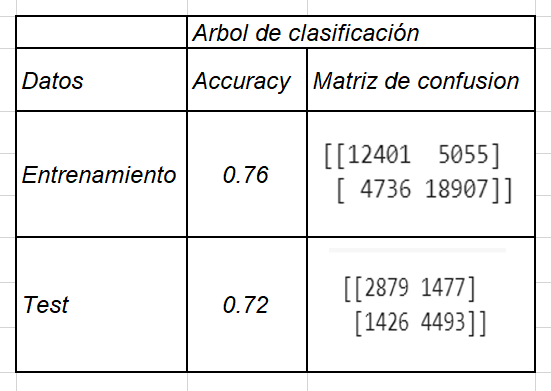

Profundidad del árbol: 28
Número de nodos terminales: 1518


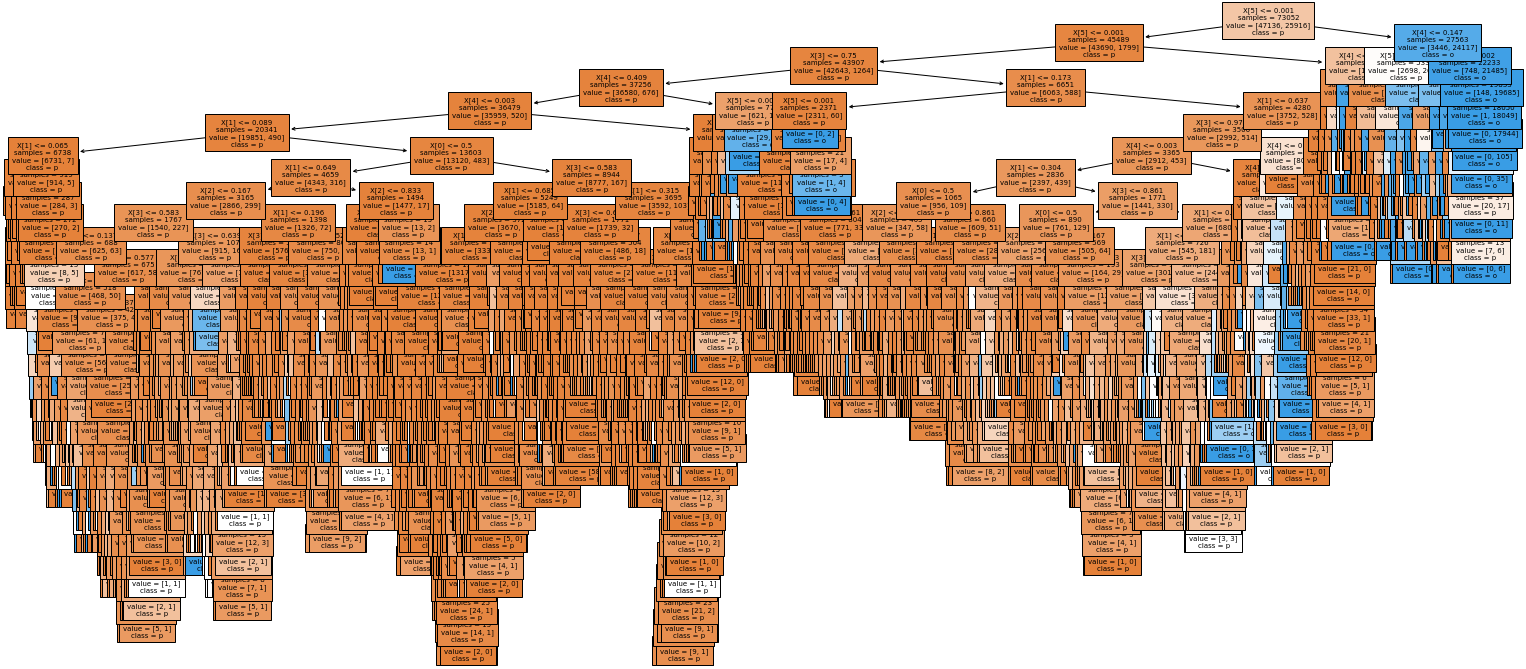

In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(26, 12))

print(f"Profundidad del árbol: {dtree.get_depth()}")
print(f"Número de nodos terminales: {dtree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dtree,
            #feature_names = labels.tolist(),
            class_names   = 'pobreza',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )


In [ ]:
dtree2 = DecisionTreeClassifier(criterion='gini',
                               min_samples_split=20,
                               min_samples_leaf=5,
                               max_depth=4,
                               class_weight={1:2})

dtree2.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight={1: 2}, max_depth=4, min_samples_leaf=5,
                       min_samples_split=20)

Profundidad del árbol: 4
Número de nodos terminales: 16


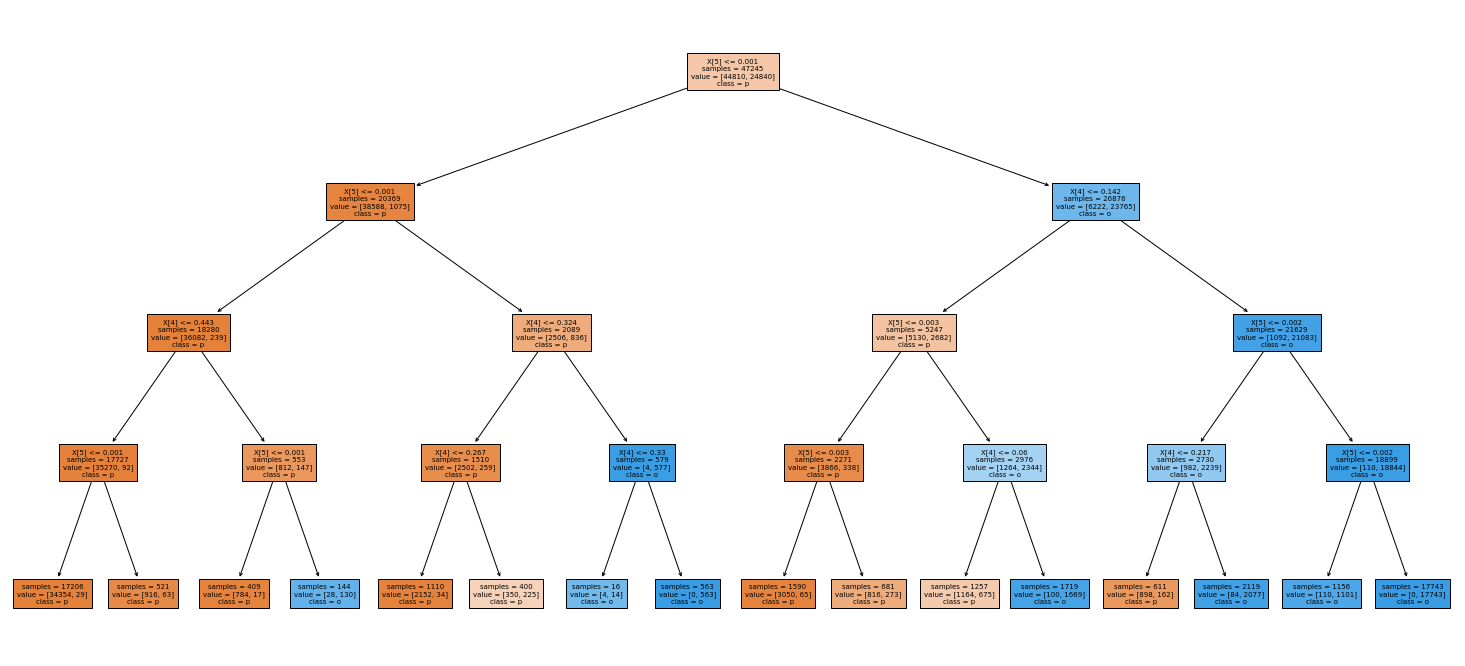

In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(26, 12))

print(f"Profundidad del árbol: {dtree2.get_depth()}")
print(f"Número de nodos terminales: {dtree2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dtree2,
            #feature_names = labels.tolist(),
            class_names   = 'pobreza',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )


In [ ]:
acc_decision_tree = round(dtree2.score(X_train_scaled,y_train)*100,2)
acc_decision_tree

96.39

# 5. Modelo de bosque aleatorio

**Creamos una instancia de la clase RandomForestClassifier y la ajustamos a nuestros datos de entrenamiento.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=600)

## 5.1 Evaluación del Random Forest con los datos de entrenamiento

Informe de clasificación y matriz de confusión para los datos de entrenamiento

In [ ]:
predictions_train=rfc.predict(X_train_scaled)

In [ ]:
cr = classification_report(y_train,predictions_train)

In [ ]:
print(cr)

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99     47136
         2.0       1.00      0.97      0.98     25916

    accuracy                           0.99     73052
   macro avg       0.99      0.98      0.99     73052
weighted avg       0.99      0.99      0.99     73052



In [ ]:
cm = confusion_matrix(y_train,predictions_train)
print(cm)

[[47083    53]
 [  841 25075]]


## 5.2 Evaluación del Random Forest con los datos de test

Se crea predicciones a partir del conjunto de test y creamos un informe de clasificación y la matriz de confusión

In [ ]:
prediction_test= rfc.predict(X_test_scaled)

In [ ]:
cr = classification_report(y_test,prediction_test)

In [ ]:
print(cr)

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99     11696
         2.0       0.99      0.96      0.97      6567

    accuracy                           0.98     18263
   macro avg       0.98      0.98      0.98     18263
weighted avg       0.98      0.98      0.98     18263



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
print(cm)

[[11622    74]
 [  264  6303]]


### Tabla de comparación

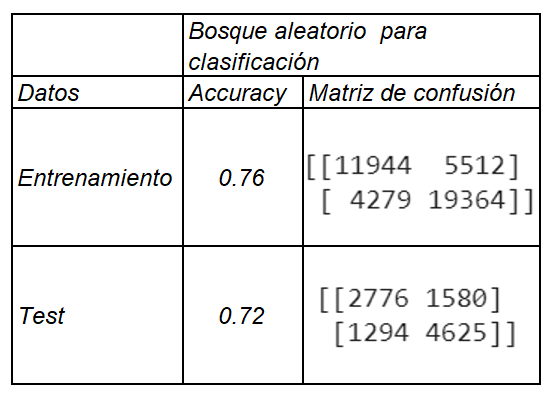

# 6. Clasificación Naive Bayes 

La técnica de clasificación [Naive Bayes](http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/) se basa en el llamado teorema bayesiano y es particularmente adecuada cuando la dimensionalidad de las entradas son altas. A pesar de su simplicidad, Naive Bayes a menudo puede superar a los métodos de clasificación más sofisticados.

### Teorema de Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbc = GaussianNB()

In [ ]:
nbc.fit(X_train_scaled,y_train)

GaussianNB()

## 6.1 Evaluación de Naive Bayes con los datos de entrenamiento
Informe de clasificación y matriz de confusión para los datos de entrenamiento

In [ ]:
predictions_train = nbc.predict(X_train_scaled)

In [ ]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

         1.0       0.72      0.96      0.82     22405
         2.0       0.95      0.66      0.78     24840

    accuracy                           0.80     47245
   macro avg       0.83      0.81      0.80     47245
weighted avg       0.84      0.80      0.80     47245



In [ ]:
cm = confusion_matrix(y_train,predictions_train)
print(cm)

[[45665  1471]
 [ 5335 20581]]


## 6.2 Evaluación de Naive Bayes con los datos de test

Se crea predicciones a partir del conjunto de test y creamos un informe de clasificación y la matriz de confusión

In [ ]:
prediction_test = nbc.predict(X_test_scaled )

In [ ]:
cr = classification_report(y_test,prediction_test)

In [ ]:
print(cr)

              precision    recall  f1-score   support

         1.0       0.71      0.96      0.82      5477
         2.0       0.95      0.66      0.78      6335

    accuracy                           0.80     11812
   macro avg       0.83      0.81      0.80     11812
weighted avg       0.84      0.80      0.79     11812



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
print(cm)

[[5270  207]
 [2181 4154]]


### Tabla de comparación

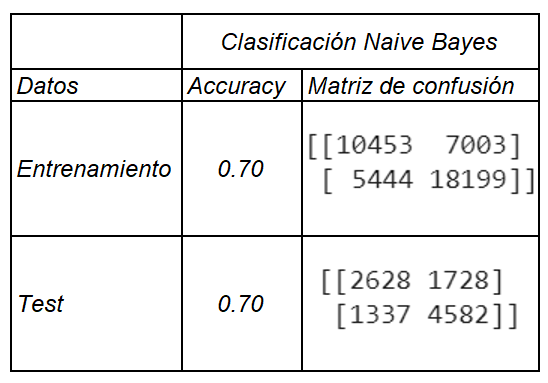




# 7. Modelo de Regresión Logística
Nota: requiere que los datos de entrada esten escalados a [0,1]

In [ ]:
# Importamos el Modelo de Regresion Logistica
from sklearn.linear_model import LogisticRegression
# Importamos las metricas de los modelos
from sklearn import metrics
# Creamos el modelo de la regresion
lr = LogisticRegression() # Creando un objeto de Regresión Logistica 'lr'

In [ ]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

## 7.1 Evaluación de la Regresion Logistica con los datos de entrenamiento

Informe de clasificación y matriz de confusión para los datos de entrenamiento

In [ ]:
predictions_train = lr.predict(X_train_scaled)

In [ ]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

         1.0       0.77      0.75      0.76     22405
         2.0       0.78      0.80      0.79     24840

    accuracy                           0.77     47245
   macro avg       0.77      0.77      0.77     47245
weighted avg       0.77      0.77      0.77     47245



In [ ]:
cm = confusion_matrix(y_train,predictions_train)
print(cm)

[[16761  5644]
 [ 5076 19764]]


## 7.2 Evaluación de la Regresion Logistica con los datos de test

Se crea predicciones a partir del conjunto de test y creamos un informe de clasificación y la matriz de confusión

In [ ]:
prediction_test = lr.predict(X_test_scaled)

In [ ]:
cr = classification_report(y_test,prediction_test)

In [ ]:
print(cr)

              precision    recall  f1-score   support

         1.0       0.76      0.76      0.76      5477
         2.0       0.79      0.80      0.79      6335

    accuracy                           0.78     11812
   macro avg       0.78      0.78      0.78     11812
weighted avg       0.78      0.78      0.78     11812



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
print(cm)

[[4162 1315]
 [1297 5038]]


### Tabla de comparación
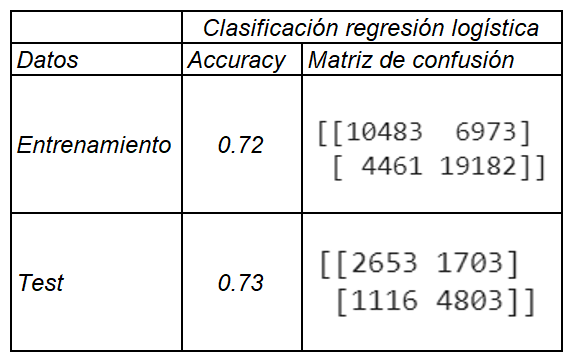


# 8. Maquinas de soporte vectorial

In [ ]:
# Importamos el Modelo de Maquina de Soporte Vectorial
from sklearn.svm import SVC
# Importamos las metricas 
from sklearn import metrics
# Creamos el modelo de la Maquina de Soporte Vectorial
svc_linear = SVC(kernel='linear') # Creando una instancia de Objeto SVR con Kernel Lineal

In [ ]:
svc_linear.fit(X_train_scaled,y_train) 

SVC(kernel='linear')

## 8.1 Evaluación de la MSV con los datos de entrenamiento

Informe de clasificación y matriz de confusión para los datos de entrenamiento

In [ ]:
predictions_train = svc_linear.predict(X_train_scaled)

In [ ]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

         1.0       0.88      0.89      0.89     47136
         2.0       0.80      0.78      0.79     25916

    accuracy                           0.85     73052
   macro avg       0.84      0.84      0.84     73052
weighted avg       0.85      0.85      0.85     73052



In [ ]:
cm = confusion_matrix(y_train,predictions_train)
print(cm)

[[42043  5093]
 [ 5671 20245]]


## 8.2 Evaluación de la MSV con los datos de test

Se crea predicciones a partir del conjunto de test y creamos un informe de clasificación y la matriz de confusión

In [ ]:
predictions_test = svc_linear.predict(X_test_scaled)

In [ ]:
cr = classification_report(y_test,predictions_test)

In [ ]:
print(cr)

              precision    recall  f1-score   support

         1.0       0.78      0.77      0.77      5477
         2.0       0.80      0.81      0.81      6335

    accuracy                           0.79     11812
   macro avg       0.79      0.79      0.79     11812
weighted avg       0.79      0.79      0.79     11812



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
print(cm)

[[4162 1315]
 [1297 5038]]


### Tabla de comparación
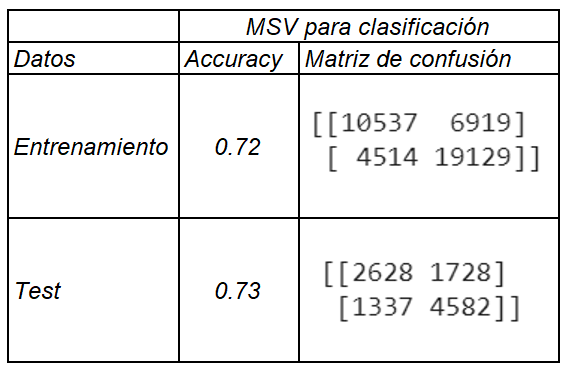


### Comparación de modelos
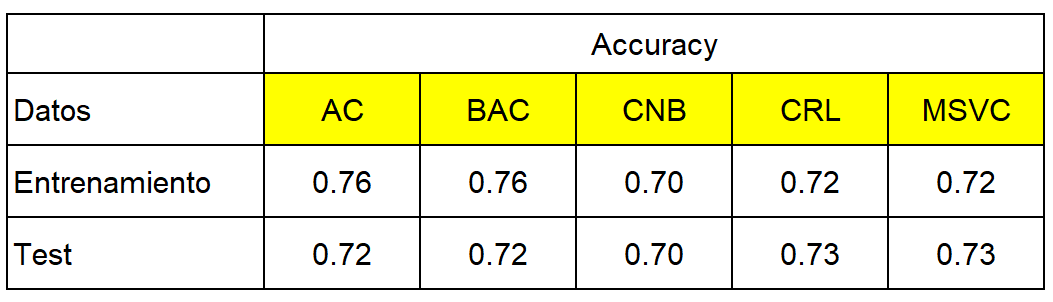

### El mejor modelo de clasificación es el Clasificación Regresión Logística

**Piura 27 de Junio del 2021**

**Dr. Flabio Gutiérrez Segura**

**Docente del Curso**